In [1]:
import pandas as pd
from surprise import Dataset, Reader

# Завантаження датасету
ratings = pd.read_csv("ml-latest-small/ratings.csv")

# Побудова об'єкта Reader
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [2]:
import numpy as np
from surprise import SVD, SVDpp, NMF
from surprise.model_selection import cross_validate

# SVD
cvd_results = cross_validate(SVD(), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
# SVDpp
cvdpp_results = cross_validate(SVDpp(), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
# NMF
nmf_results = cross_validate(NMF(), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8816  0.8666  0.8720  0.8714  0.8777  0.8739  0.0052  
MAE (testset)     0.6767  0.6673  0.6702  0.6709  0.6724  0.6715  0.0031  
Fit time          2.51    2.66    2.63    2.66    2.62    2.62    0.06    
Test time         0.60    0.59    0.44    0.45    0.57    0.53    0.07    
Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8660  0.8542  0.8604  0.8728  0.8539  0.8615  0.0072  
MAE (testset)     0.6645  0.6520  0.6602  0.6709  0.6543  0.6604  0.0069  
Fit time          236.48  235.13  237.30  234.39  235.41  235.74  1.03    
Test time         30.77   31.02   30.76   31.28   30.96   30.96   0.19    
Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (tests

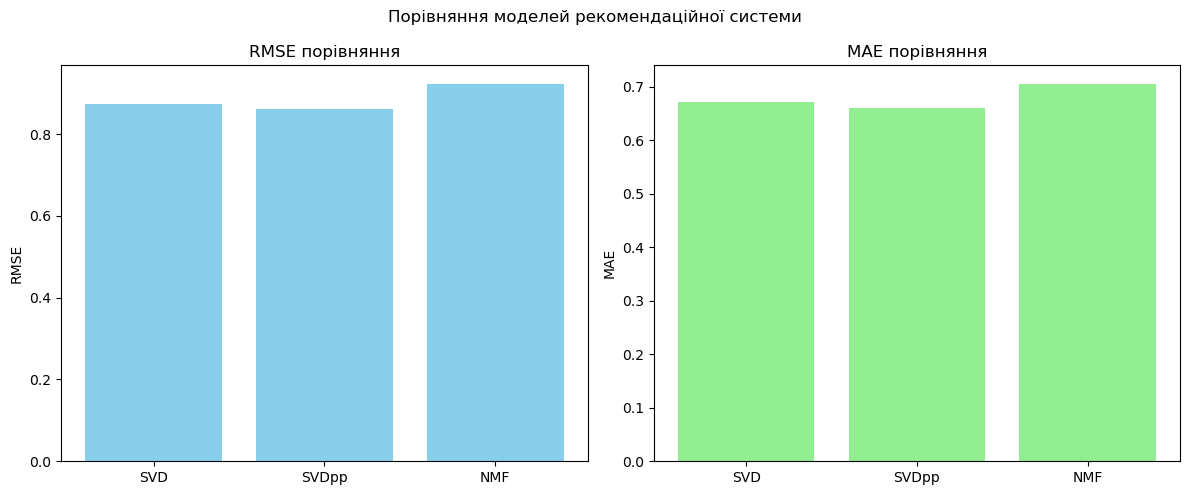

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Назви моделей
models = ['SVD', 'SVDpp', 'NMF']

# Середні значення метрик
rmse_scores = [
    np.mean(cvd_results['test_rmse']),
    np.mean(cvdpp_results['test_rmse']),
    np.mean(nmf_results['test_rmse'])
]

mae_scores = [
    np.mean(cvd_results['test_mae']),
    np.mean(cvdpp_results['test_mae']),
    np.mean(nmf_results['test_mae'])
]

# Побудова графіків
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(models, rmse_scores, color='skyblue')
axes[0].set_title('RMSE порівняння')
axes[0].set_ylabel('RMSE')

axes[1].bar(models, mae_scores, color='lightgreen')
axes[1].set_title('MAE порівняння')
axes[1].set_ylabel('MAE')

plt.suptitle('Порівняння моделей рекомендаційної системи')
plt.tight_layout()
plt.show()

In [4]:
results_df = pd.DataFrame({
    'Model': ['SVD', 'SVDpp', 'NMF'],
    'RMSE': [
        np.mean(cvd_results['test_rmse']),
        np.mean(cvdpp_results['test_rmse']),
        np.mean(nmf_results['test_rmse'])
    ],
    'MAE': [
        np.mean(cvd_results['test_mae']),
        np.mean(cvdpp_results['test_mae']),
        np.mean(nmf_results['test_mae'])
    ]
})
results_df

,Model,RMSE,MAE
0,SVD,0.873857,0.671487
1,SVDpp,0.861451,0.660396
2,NMF,0.921810,0.705146


In [5]:
from surprise.model_selection import GridSearchCV

param_grid = {
    'n_epochs': [10, 20],
    'lr_all': [0.002, 0.005],
    'reg_all': [0.02, 0.1]
}

gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(data)

print("Best RMSE:", gs.best_score['rmse'])
print("Best Params:", gs.best_params['rmse'])

Best RMSE: 0.8750010257857861
Best Params: {'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.1}
